# Types of Unsupervised Learning

Two kinds of unsupervised learning:
1. Dataset Transformations
2. Clustering Algorithms

**Unsupervised transformation of dataset**
Create a new representation of the data which might be easier for human/ML algorithm to understand. Dimensionality reduction is common, which takes a high-dimensional representation of the data (many features) and summarizes the essential characteristics with fewer features. Common application for dimensionality reduction is to reduce to two dimension for visualization purposes.

Another application is finding parts or components that "make up" the data (e.g. topic extraction from text). This can be useful for tracking the discussion of themes like election on social media.

**Clustering Algorithms**
It partition data into distinct groups of similar items.

# Challenges in Unsupervised Learning
Major challenge is to evaluate whether the algorithm learned something useful. Often the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.

Therefore, unsupervised algorithms are used often in an exploratory setting rather than as a part of a larger automatic system. It can also be used in preprocessing step for supervised algorithms as learning a new representation of the data may improve the accuracy or performance of supervised algorithms.

# Different kinds of preprocessing and scaling
Preprocessing methods are not unsupervised learning and are ofthen used in tandem with supervised learning algorithms. Some learning algorithms, like neural networks and SVMs, are very sensitive to the scaling of the data. Common practice is to adjust the features so that the data representation is more suitable for those algorithms.

**StandardScaler**
Ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features.

**RobustScaler** 
It works similarly to the StandardScaler but it uses the median and quartiles, 1 instead of mean and variance. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors).

**MinMaxScaler**
It shifts the data such that all features are exactly between 0 and 1.

**Normalizer** 
It does a very different kind of rescaling. It scales each data point such that the feature vector has a Euclidean length of 1.

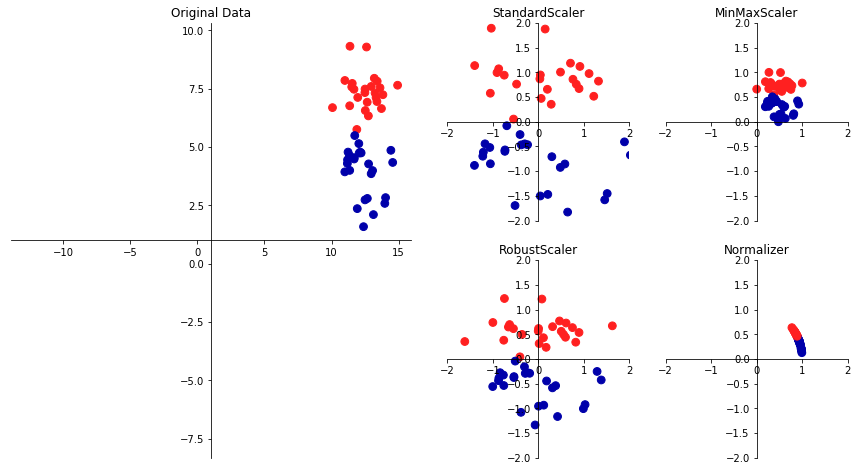

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
from IPython.display import display

mglearn.plots.plot_scaling()

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
"""
We want to apply the kernel SVM ( SVC ) to the cancer dataset, and use MinMaxScaler for preprocessing the data. 
We start by loading our dataset and splitting it into a training set and a test set 
(we need separate training and test sets to evaluate the supervised model we will build after the preprocessing).
"""
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

"""
The dataset contains 569 data points, each represented by 30 measurements.
Split the dataset into 426 samples for the training set and 143 for the test set.
"""
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
"""
The fit method computes the min and max value of each feature on the training set.
The scaler is only provided witht eh data (X_train) when fit is called, and y_train is not used.
"""
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
"""
To apply the transformation to actually scale the training data, we use the tranform method of the scaler.
The transform method is used whenever a model returns a new representation of the data.
"""
# Transform data
X_train_scaled = scaler.transform(X_train)

"""
The transformed data has the same shape as the original data, the features are simply shifted and scaled.
All of the features are now between 0 and 1.
"""
# Print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("per-feature minimum before scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum before scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum before scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
"""
Need to transform the test set before applying SVM to the scaled data.
"""
# Transform test data
X_test_scaled = scaler.transform(X_test)

"""
The min and max are not 0 and 1 and some are even outside of 0-1 rang after scaling the test set. 
That is because MinMaxScaler always appies exactly the same transformation to training and test set.
Which means the transform method always subtracts the training set minimum and divides by the training set range, 
which might be different from the minimum and range for the test set.
"""
# Print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


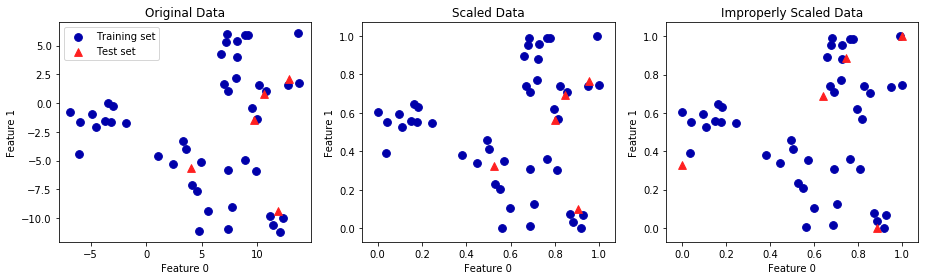

In [7]:
"""
It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.
Following shows what would happen if we use minimum and range of test set instead.
"""
from sklearn.datasets import make_blobs
# Make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# Split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# Rescale the test set separately
# So test set min is 0 and test set max is 1.
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [8]:
"""
All models that have a transform method also have a fit_transform method so
no need to separate fit and transform step.

While fit_transform is not necessarily more efficient for all models, it is 
still good practice when trying transforming training set.
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)

# Same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

print("per-feature minimum for calling fit and transform:\n{}".format(X_scaled.min(axis=0)))
print("per-feature minimum for calling fit_transform:\n{}".format(X_scaled_d.min(axis=0)))

print("per-feature maximum for calling fit and transform:\n{}".format(X_scaled.max(axis=0)))
print("per-feature maximum for calling fit_transform:\n{}".format(X_scaled_d.max(axis=0)))

per-feature minimum for calling fit and transform:
[-2.05635155 -1.72301091]
per-feature minimum for calling fit_transform:
[-2.05635155 -1.72301091]
per-feature maximum for calling fit and transform:
[1.4448942  1.59644336]
per-feature maximum for calling fit_transform:
[1.4448942  1.59644336]


In [9]:
"""
Using MinMaxScaler on SVC on cancer dataset.
Fit the SVC on the original data first for comparison.
"""
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [10]:
"""
Scale the data using MinMaxScaler before fitting the SVC.
From the accuracy output, the effect of scaling the data is quite significant.

It is good practice to use the scaling mechanisms provided by scikit-learn 
instead of reimplementing them yourself.
"""
# Preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [11]:
"""
You can replace one preprocessing algorithm with anotuer by chaning the class,
as all the preprocessing classes have the same interface, consisting the 
fit and transform methods.
"""

# Preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("SVM test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test set accuracy: 0.96


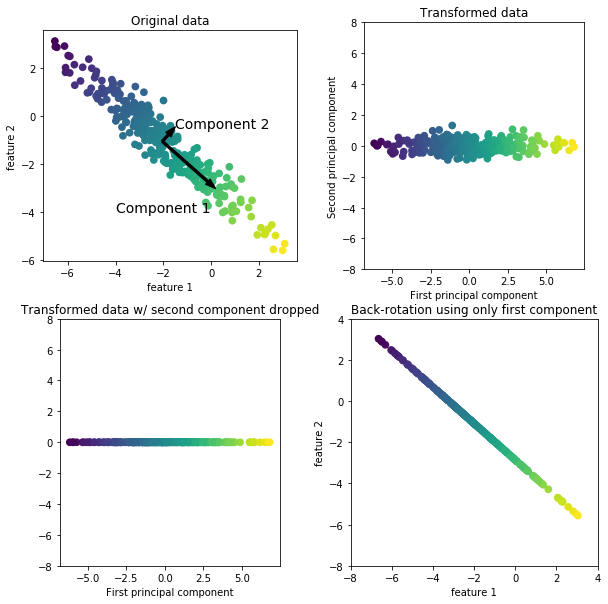

In [12]:
"""
Dimensionality Reduction, Feature Extraction, and Manifold Learning

Principal Component Analysis (PCA)
"""
mglearn.plots.plot_pca_illustration()

The Breast Cancer dataset has 30 features, it is hard to use scatter plots, even with the use of pair plot.We can never be able to look at all these plots in detail or understand them.

Simpler visualization is through computing histogram of each of the features for the two classes,
1. bengin cancer
2. malignant cancer

Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin). Each plot overlays two histograms, one for all of the points in the benign class and one for all the points in the malignant class. This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples. 

For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.

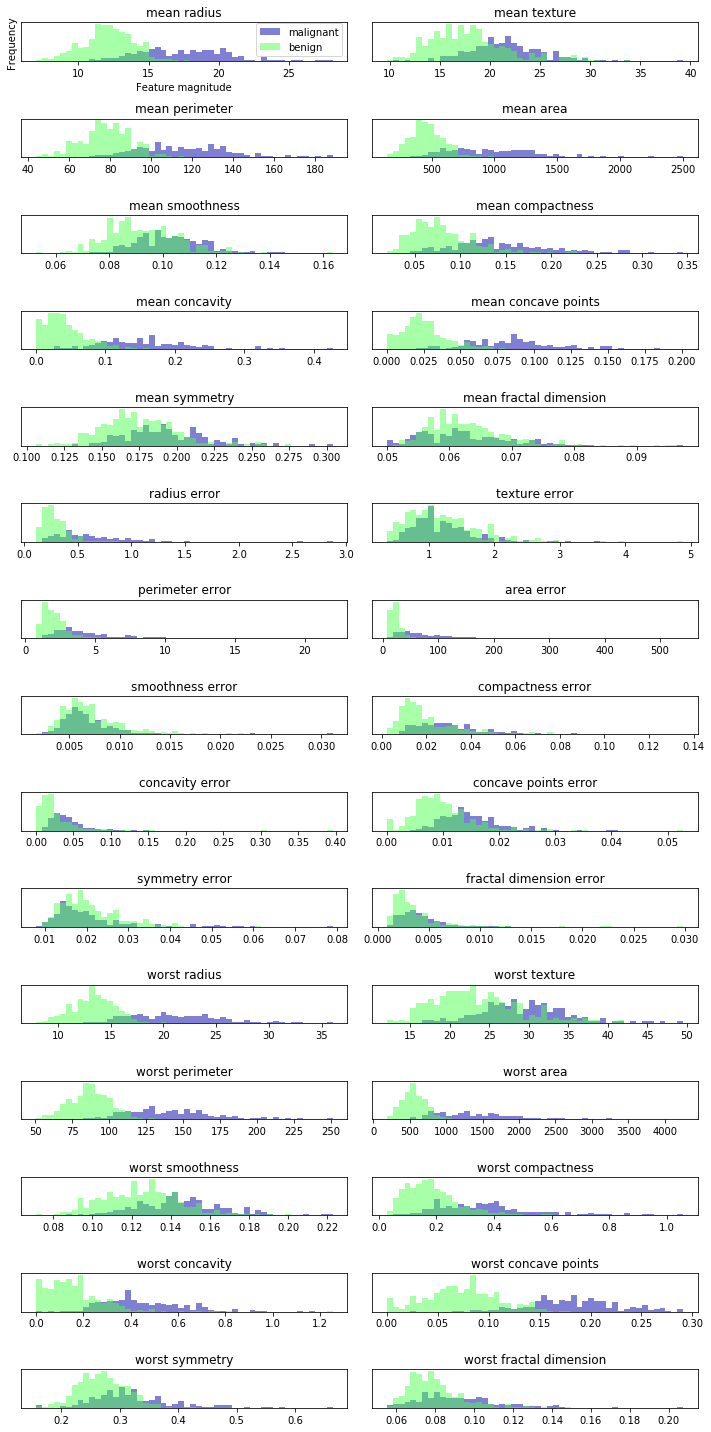

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]  # First class/label
benign = cancer.data[cancer.target == 1]  # Second class/label

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

However, above histogram doesn’t show us anything about the interactions between variables and how these relate to the classes. 
Using PCA, we can capture the main interactions and get a slightly more complete picture. 
We can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot. 



In [14]:
# Before we apply PCA, need to scale data so that each feature has unit variance using StandardScaler.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [15]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# Fit PCA model to breast cancer data
pca.fit(X_scaled)

# Transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape:(569, 2)


Text(0,0.5,'Second principal component')

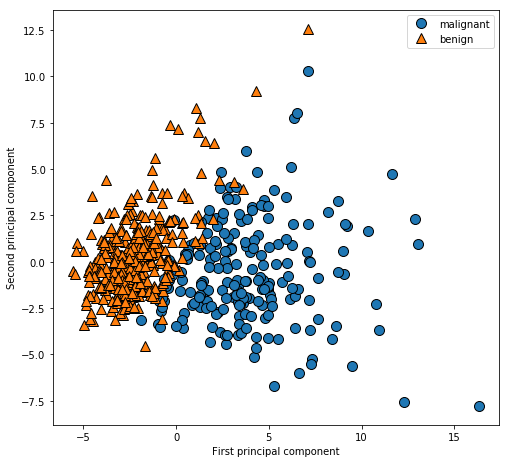

In [16]:
# Plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points. You can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant points are more spread out than the benign points—something that we could already see a bit from the histograms in In[13].

A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex. The principal components themselves are stored in the components_ attribute of the PCA object during fitting.

In [17]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on.

In [18]:
# Let’s have a look at the content of components_.
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal components')

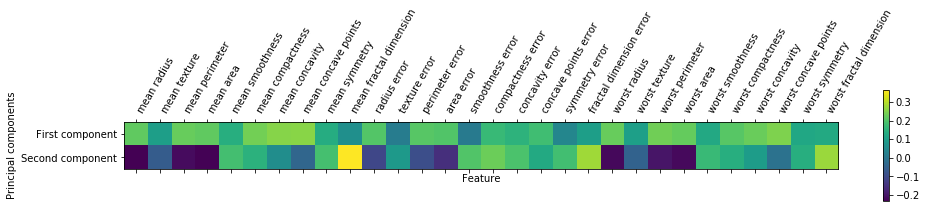

In [19]:
# Can also visualize the coefficients using a heat map, which might be easier to understand.
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

in the first component, all features have the same sign (it’s positive, it doesn’t matter which direction the arrow points in). That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features. This mixing of all features is what makes explaining the axes above plot so tricky.

Eigenfaces for feature extraction
Another application of PCA that we mentioned earlier is feature extraction. The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given. 

A great example of an application where feature extraction is helpful is with images. Images are made up of pixels, usually stored as red, green, and blue (RGB) intensities. Objects in images are usually made up of thousands of pixels, and only together are they meaningful.

Below is a very simple application of feature extraction on images using PCA, by working with face images from the Labeled Faces in the Wild dataset. This dataset contains face images of celebrities downloaded from the Internet, and it includes faces of politicians, singers, actors, and athletes from the early 2000s. We use grayscale versions of these images, and scale them down for faster processing.

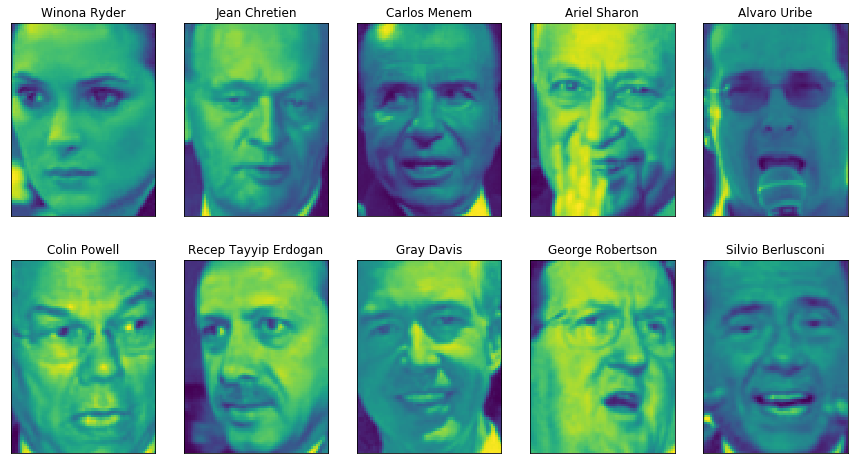

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87×65 pixels large, belonging to 62 different people:

In [21]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


The dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:

In [22]:
# Count how often each target appears
counts = np.bincount(people.target)

# Print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 2 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 
Amelie Mauresmo            21 Andre Agassi               36 
Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 
Bill Clinton               29 Carlos Menem               21 
Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 
George W Bush             530 Gerhard Schroeder         109 
Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 
Hans Blix                  39 Hugo Chavez                71 
Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 
Jennifer Aniston           21 Jennifer Capriati          42 
Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 
John Negroponte         

In [23]:
# To make the data less skewed, we will only take up to 50 images of each person 
# (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush):
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# Scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.0

A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database. This has applications in photo collection, social media, and security applications. One way to solve this problem would be to build a classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e., very few training examples per class). That makes it hard to train most classifiers.

Additionally, you often want to be able to add new people easily, without needing to retrain a large model.

A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying. This classifier could in principle work with only a single training example per class.

In [24]:
# Let’s take a look at how well KNeighborsClassifier does here
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# Build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


We obtain an accuracy of 26.6%, which is not actually that bad for a 62-class classification problem (random guessing would give you around 1/62 = 1.6% accuracy), but is also not great. We only correctly identify a person every fourth time.

This is where PCA comes in. Computing distances in the original pixel space is quite a bad way to measure similarity between faces. When using a pixel representation to compare two images, we compare the grayscale value of each individual pixel to the value of the pixel in the corresponding position in the other image. This representation is quite different from how humans would interpret the image of a face, and it is hard to capture the facial features using this raw representation. For example, using pixel distances means that shifting a face by one pixel to the right corresponds to a drastic change, with a completely different representation. We hope that using distances along principal components can improve our accuracy. Here, we enable the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation.

Reusing the data from above again, whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse

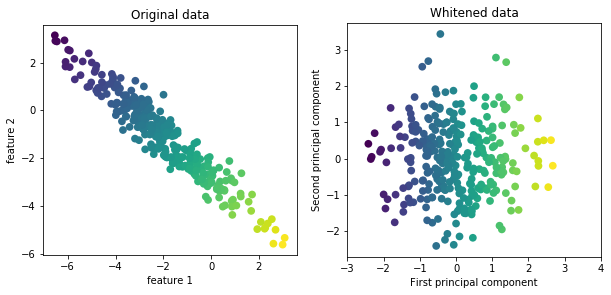

In [25]:
mglearn.plots.plot_pca_whitening()

In [26]:
# We fit the PCA object to the training data and extract the first 100 principal components. 
# Then we transform the training and test data:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [27]:
# The new data has 100 features, the first 100 principal components. 
# Now, we can use the new representation to classify our images using a one-nearest-neighbors classifier :
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


Our accuracy improved quite significantly, from 26.6% to 35.7%, confirming our intuition that the principal components might provide a better representation of the data. 

For image data, we can also easily visualize the principal components that are found. Remember that components correspond to directions in the input space. The input space here is 87×65-pixel grayscale images, so directions within this space are also 87×65-pixel grayscale images.

In [28]:
# Let’s look at the first couple of principal components
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


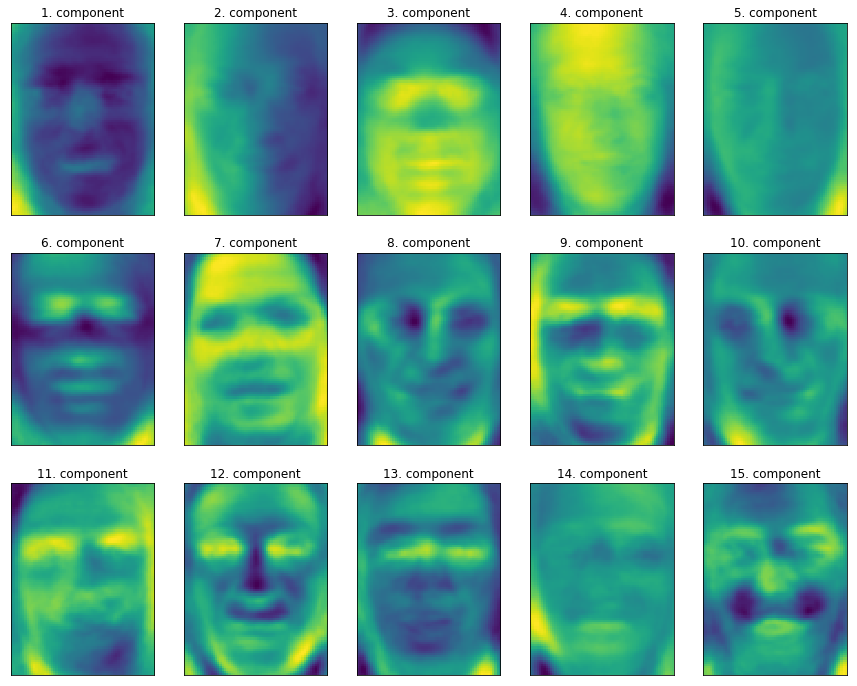

In [29]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

While we certainly cannot understand all aspects of these components, we can guess which aspects of the face images some of the components are capturing. The first component seems to mostly encode the contrast between the face and the background, the second component encodes differences in lighting between the right and the left half of the face, and so on. While this representation is slightly more semantic than the raw pixel values, it is still quite far from how a human might perceive a face. As the PCA model is based on pixels, the alignment of the face (the position of eyes, chin, and nose) and the lighting both have a strong influence on how similar two images are in their pixel representation. But alignment and lighting are probably not what a human would perceive first. When asking people to rate similarity of faces, they are more likely to use attributes like age, gender, facial expression, and hair style, which are attributes that are hard to infer from the pixel intensities. It’s important to keep in mind that algorithms often interpret data (particularly visual data, such as images, which humans are very familiar with) quite differently from how a human would.

Let’s come back to the specific case of PCA, though. We introduced the PCA transformation as rotating the data and then dropping the components with low variance. Another useful interpretation is to try to find some numbers (the new feature values after the PCA rotation) so that we can express the test points as a weighted sum of the principal components (see Figure 3-10 ).

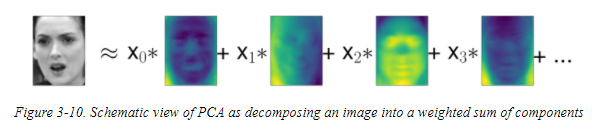

Here, x 0 , x 1 , and so on are the coefficients of the principal components for this data point; in other words, they are the representation of the image in the rotated space. Another way we can try to understand what a PCA model is doing is by looking at the reconstructions of the original data using only some components. In Figure 3-3 , after dropping the second component and arriving at the third panel, we undid the rotation and added the mean back to obtain new points in the original space with the second component removed, as shown in the last panel. We can do a similar transformation for the faces by reducing the data to only some principal components and then rotating back into the original space. This return to the original feature space can be done using the inverse_transform method. Here, we visualize the reconstruction of some faces using 10, 50, 100, or 500 components.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_______________________________________________________pca_faces - 16.4s, 0.3min


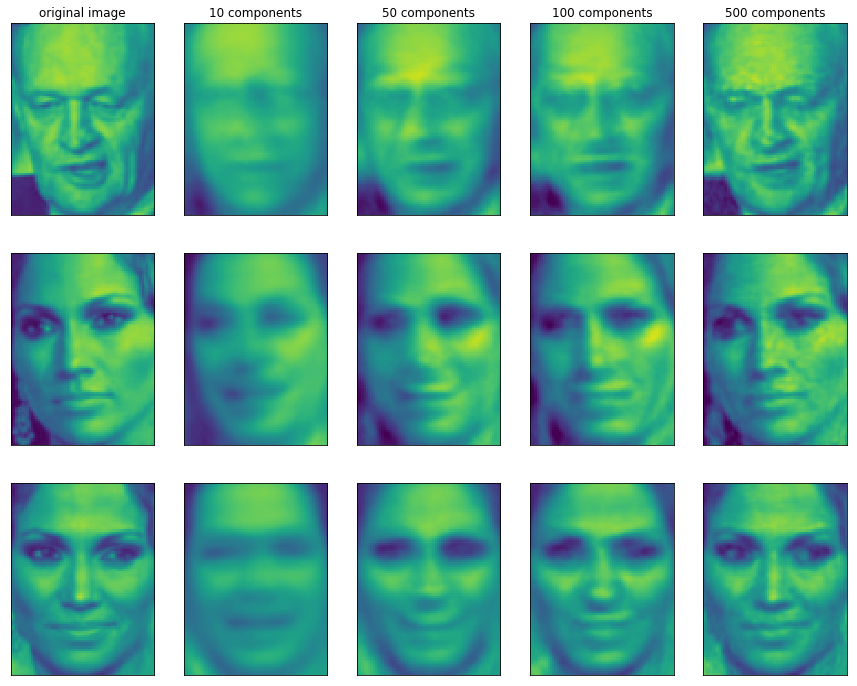

In [30]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

You can see that when we use only the first 10 principal components, only the essence of the picture, like the face orientation and lighting, is captured. By using more and more principal components, more and more details in the image are preserved. This corresponds to extending the sum in Figure 3-10 to include more and more terms. Using as many components as there are pixels would mean that we would not discard any information after the rotation, and we would reconstruct the image perfectly. 

We can also try to use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components, with classes given by who is shown in the image, similarly to what we did for the cancer dataset.

Text(0,0.5,'Second principal component')

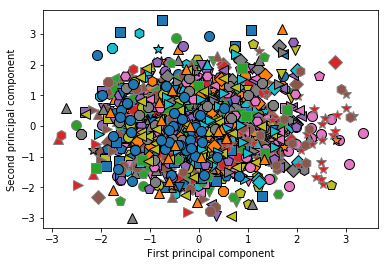

In [31]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

As you can see, when we use only the first two principal components the whole data is just a big blob, with no separation of classes visible. This is not very surprising, given that even with 10 components, as shown earlier, PCA only captures very rough characteristics of the faces.


# Non-Negative Matrix Factorization (NMF)

Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features. It works similarly to PCA and can also be used for dimensionality reduction. As in PCA, we are trying to write each data point as a weighted sum of some components. But whereas in PCA we wanted components that were orthogonal and that explained
as much variance of the data as possible, in NMF, we want the components and the coefficients to be non-negative; that is, we want both the components and the coefficients to be greater than or equal to zero. Consequently, **this method can only be applied to data where each feature is non-negative, as a non-negative sum of non-negative components cannot become negative**. 

The process of decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition (or overlay) of several independent sources, such as an audio track of multiple people speaking, or music with many instruments. In these situations, NMF can identify the original components that make up the combined data. Overall, NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects. The eigenfaces in Figure 3-9 , for example, contain both positive and negative parts, and as we mentioned in the description of PCA, the sign is actually arbitrary. Before we apply NMF to the face dataset, let’s briefly revisit the synthetic data.

In contrast to when using PCA, we need to ensure that our data is positive for NMF to be able to operate on the data. This means where the data lies relative to the origin (0, 0) actually matters for NMF. Therefore, you can think of the non-negative components that are extracted as directions from (0, 0) toward the data. 

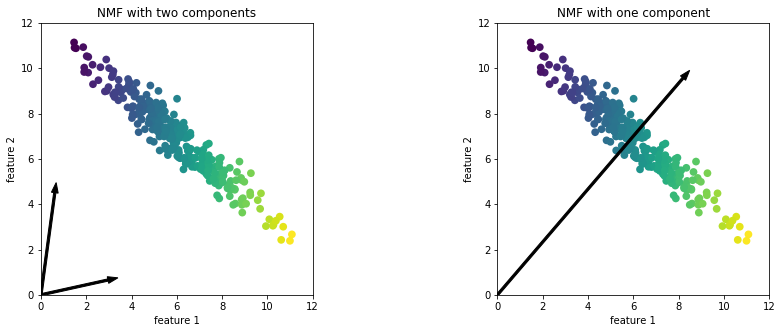

In [32]:
# The following example shows the results of NMF on the two-dimensional toy data:
mglearn.plots.plot_nmf_illustration()

For NMF with two components, as shown on the left, it is clear that all points in the data can be written as a positive combination of the two components. If there are enough components to perfectly reconstruct the data (as many components as there are features), the algorithm will choose directions that point toward the extremes of the data. 

If we only use a single component, NMF creates a component that points toward the mean, as pointing there best explains the data. You can see that in contrast with PCA, reducing the number of components not only removes some directions, but creates an entirely different set of components! Components in NMF are also not ordered in any specific way, so there is no “first non-negative component”: all components play an equal part. 

NMF uses a random initialization, which might lead to different results depending on the random seed. In relatively simple cases such as the synthetic data with two components, where all the data can be explained perfectly, the randomness has little effect (though it might change the order or scale of the components). In more complex situations, there might be more drastic changes.